<a href="https://colab.research.google.com/github/life-ofpi/2023_AI/blob/main/AI_HW1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
train=pd.read_csv("train (2).csv")
test=pd.read_csv("test (2).csv")

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,800,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.00,1,1,345773,24.1500,NaN,S
1,801,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S
2,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,26.2500,NaN,S
3,803,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
4,804,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


# Feature EDA,분석

In [ ]:
print(train.info())
print(test.info())
#cabin,age null값 다수 존재
#dtype으로 variable type도 알 수 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  799 non-null    int64  
 1   Survived     799 non-null    int64  
 2   Pclass       799 non-null    int64  
 3   Name         799 non-null    object 
 4   Sex          799 non-null    object 
 5   Age          636 non-null    float64
 6   SibSp        799 non-null    int64  
 7   Parch        799 non-null    int64  
 8   Ticket       799 non-null    object 
 9   Fare         799 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     798 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 75.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  92 non-null     int64  
 1   Pclas

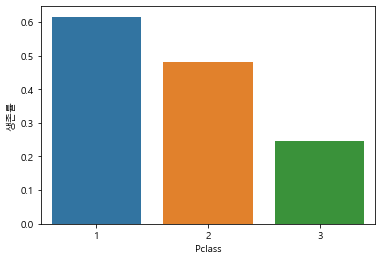

In [ ]:
#pclass별 생존율
class_survived=train.groupby('Pclass')['Survived'].mean()
sns.barplot(x=class_survived.index,y=class_survived.values)
plt.ylabel("생존률")
plt.show()
#우등 등석순으로 생존률이 높다. 의미있는 변수

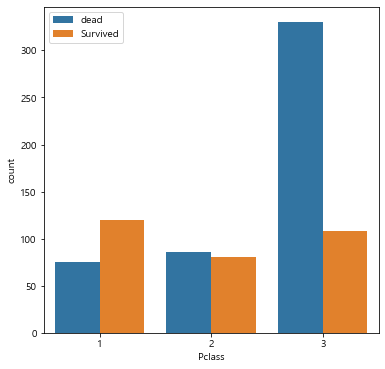

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(data=train,x="Pclass",hue='Survived',ax=ax)
labels=['dead','Survived']
ax.legend(labels=labels)
plt.show()
#3class의 탑승객들이 가장 많이 사망했다.

Sex     Survived
female  0            71
        1           211
male    0           420
        1            97
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

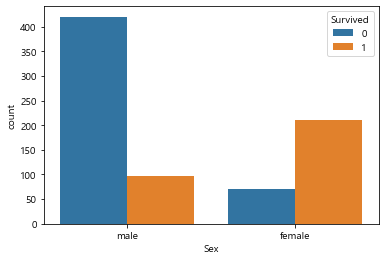

In [ ]:
#여자가 생존율이 훨씬 더 높다
import warnings
warnings.filterwarnings('ignore')
print(train.groupby(['Sex','Survived'])["Survived"].count())
sns.countplot('Sex',hue='Survived',data=train)
#성별은 매우 의미있다

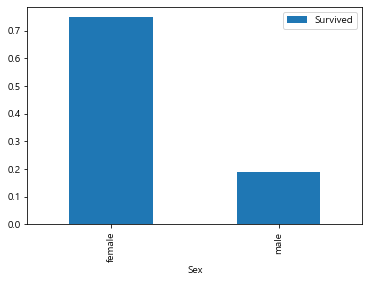

In [ ]:
#성별 생존율
train[['Sex','Survived']].groupby('Sex').mean().plot.bar()
plt.show()
#여성이 약 3배 이상 더 높음

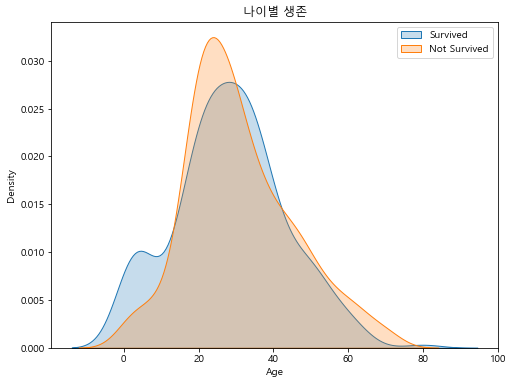

In [ ]:
#Age
survived = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]
plt.figure(figsize=(8,6))
sns.kdeplot(survived['Age'], shade=True, label='Survived')
sns.kdeplot(dead['Age'], shade=True, label='Not Survived')
plt.title('나이별 생존')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
#젊을수록 확연히 생존확률 올라감

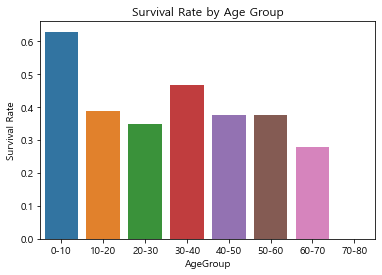

In [ ]:
# 나이 구간 생성
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

# 구간별 생존율 계산
age_group_survived = train.groupby('AgeGroup')['Survived'].mean()
sns.barplot(x=age_group_survived.index, y=age_group_survived.values)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()
#나이도 의미있는 변수

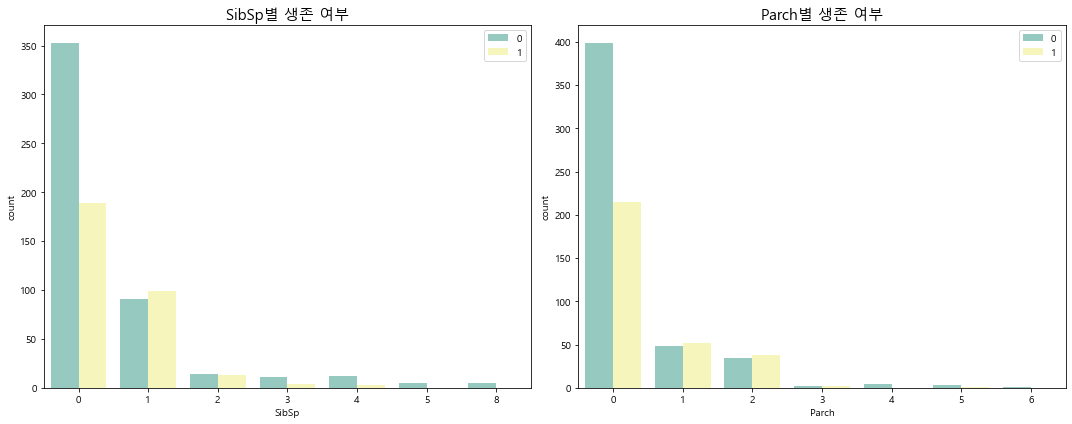

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# SibSp
axes[0].set_title("SibSp별 생존 여부", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train, ax=axes[0], palette="Set3")
axes[0].legend(loc='upper right')

# Parch
axes[1].set_title("Parch별 생존 여부", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1], palette="Set3")
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
#Embarked s항구가 가장 적게 살아남음
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()
#항구는 의미있는 변수

,Survived
Embarked,
C,0.536913
Q,0.397260
S,0.343750


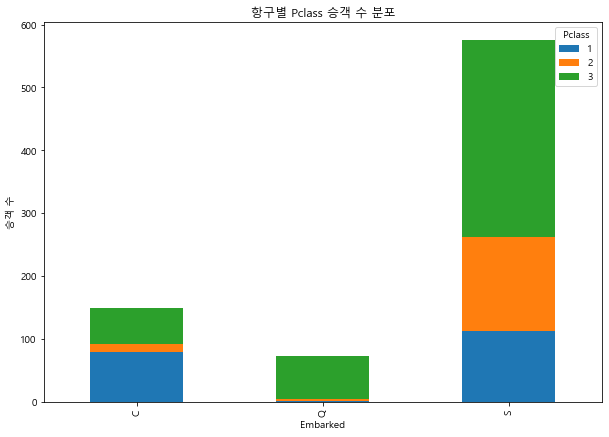

In [ ]:
embarked_pclass_group = train.groupby(['Embarked', 'Pclass']).size().unstack()
embarked_pclass_group.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title("항구별 Pclass 승객 수 분포")
plt.ylabel("승객 수")
plt.show()
#s항구에서 생존이 가장 낮은 3class승객이 가장 많았기 때문이다.

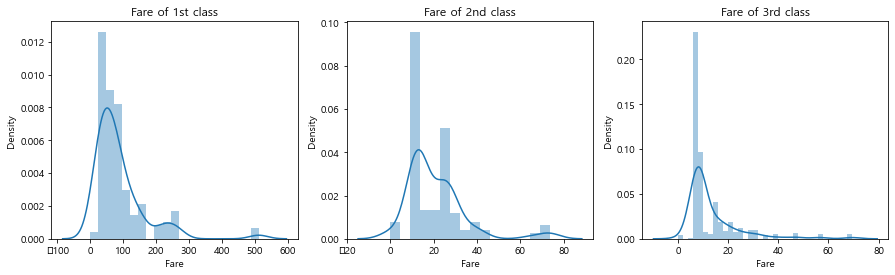

In [ ]:
f, ax = plt.subplots(1,3,figsize=(15,4))
sns.distplot( train[train['Pclass']==1]['Fare'] , ax=ax[0])
ax[0].set_title('Fare of 1st class')
sns.distplot(train[train['Pclass']==2]['Fare'] , ax=ax[1])
ax[1].set_title('Fare of 2nd class')
sns.distplot(train[train['Pclass']==3]['Fare'] , ax=ax[2])
ax[2].set_title('Fare of 3rd class')
plt.show()
#3class의 요금이 확연히 낮으므로 생존도 낮다 1>2>3class 순.

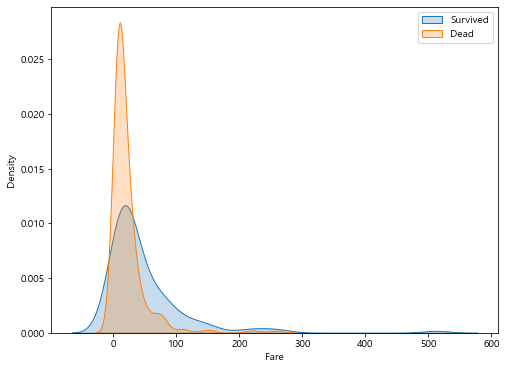

In [ ]:
#fare
plt.figure(figsize=(8,6))
survived = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]
sns.kdeplot(survived['Fare'], shade=True, label='Survived')
sns.kdeplot(dead['Fare'], shade=True, label='Dead')
plt.legend()
plt.show()
#요금을 낮게낸쪽이 사망률이 높음

<AxesSubplot:>

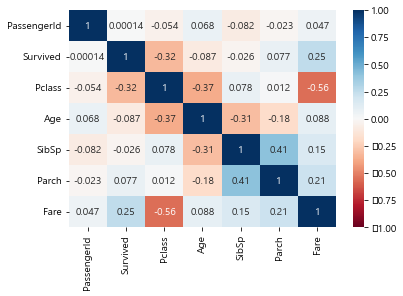

In [ ]:
train_corr=train.corr(method='pearson')
train_corr
sns.heatmap(train_corr,annot=True, vmin=-1,vmax=1,cmap='RdBu')


# Feature 사용여부,Engineering    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [ ]:
print(train.describe())
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   799.000000  799.000000  799.000000  636.000000  799.000000   
mean    400.000000    0.385482    2.304130   29.870943    0.518148   
std     230.795725    0.487014    0.837032   14.555748    1.064044   
min       1.000000    0.000000    1.000000    0.670000    0.000000   
25%     200.500000    0.000000    2.000000   21.000000    0.000000   
50%     400.000000    0.000000    3.000000   28.000000    0.000000   
75%     599.500000    1.000000    3.000000   38.000000    1.000000   
max     799.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  799.000000  799.000000  
mean     0.372966   33.049660  
std      0.801671   51.556263  
min      0.000000    0.000000  
25%      0.000000    7.925000  
50%      0.000000   14.500000  
75%      0.000000   31.275000  
max      6.000000  512.329200  
       PassengerId     Pclass        Age      SibSp      Parch        Fare
count 

In [ ]:
test.isnull().sum()
#age, cabin, embarked에 결측치가 있음

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            14
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          73
Embarked        1
dtype: int64

In [ ]:
train.isnull().sum()
#Age,embarked를 채워야한다. cabin은 drop

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            163
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          614
Embarked         1
AgeGroup       164
dtype: int64

관련없거나 필요없는 column들은 다 제거한다

In [ ]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
train = train.drop(['AgeGroup'], axis=1)
#필요없는 column,의미 없는 것들 drop해줌

In [ ]:
both = [train, test] #바꾸기 편하게 합쳐줌

In [ ]:
#age 분류
for data in both:
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age']
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,7.2500,S
1,1,1,female,2.0,1,0,71.2833,C
2,1,3,female,1.0,0,0,7.9250,S
3,1,1,female,2.0,1,0,53.1000,S
4,0,3,male,2.0,0,0,8.0500,S


In [ ]:
#group별 median값으로 결측치 메워줌
for data in both:
    data["Age"] = data.groupby(data.Pclass).Age.transform(lambda x: x.fillna(x.median()))


In [ ]:
#Sex 범주형에서 - > 수치화 하기
train['Sex'] = train['Sex'].map({'female':1, 'male':0})
test['Sex'] = test['Sex'].map({'female':1, 'male':0})


In [ ]:
#embarked 항구를 one-hot-encoding
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,1.0,1,0,7.2500,0,0,1
1,1,1,1,2.0,1,0,71.2833,1,0,0
2,1,3,1,1.0,0,0,7.9250,0,0,1
3,1,1,1,2.0,1,0,53.1000,0,0,1
4,0,3,0,2.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
794,0,3,0,1.0,0,0,7.8958,0,0,1
795,0,2,0,2.0,0,0,13.0000,0,0,1
796,1,1,1,3.0,0,0,25.9292,0,0,1
797,1,3,1,1.0,0,0,8.6833,0,0,1


# modeling and accuracy

In [ ]:
X_train = train.drop(['Survived'], axis=1)
y_train = train[['Survived']]
#test data
X_test=test.drop("PassengerId",axis=1).copy()
X_train.shape, y_train.shape, X_test.shape


((799, 9), (799, 1), (92, 9))

In [ ]:
#logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_proba=logreg.predict_proba(X_test)
y_pred=np.argmax(y_pred_proba,axis=1)

#train data 모델의 정확도
print(round(accuracy_score(y_train, logreg.predict(X_train)), 2*100))
#약 80프로의 정확도!

0.799749687108886


In [ ]:
submission=pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred
})
submission.to_csv("AI_60212407_HW1.csv",index=False)


In [ ]:
submission

,PassengerId,Survived
0,800,1
1,801,0
2,802,1
3,803,0
4,804,0
...,...,...
87,887,0
88,888,1
89,889,1
90,890,0
